## Math 425 Computation Linear Algebra

#### In-class Problems

March 7th - March 29th

Brent A. Thorne brentathorne@gmail.com

https://developer.nvidia.com/gpugems/gpugems3/part-iv-image-effects/chapter-25-rendering-vector-art-gpu

### The Fundamental Theorem of Linear Algebra

##### According to Gilbert Strang. 

Let f be a linear map between two finite-dimensional vector spaces, represented by a m×n matrix M of rank r, then:

    r is the dimension of the column space of M, which represents the image of f;
    n – r is the dimension of the null space of M, which represents the kernel of f;
    m – r is the dimension of the cokernel of f.

The transpose MT of M is the matrix of the dual f* of f. It follows that one has also:

    r is the dimension of the row space of M, which represents the image of f*;
    m – r is the dimension of the left null space of M, which represents the kernel of f*;
    n – r is the dimension of the cokernel of f*.

The two first assertions are also called the rank–nullity theorem. 

### The Four Subspaces
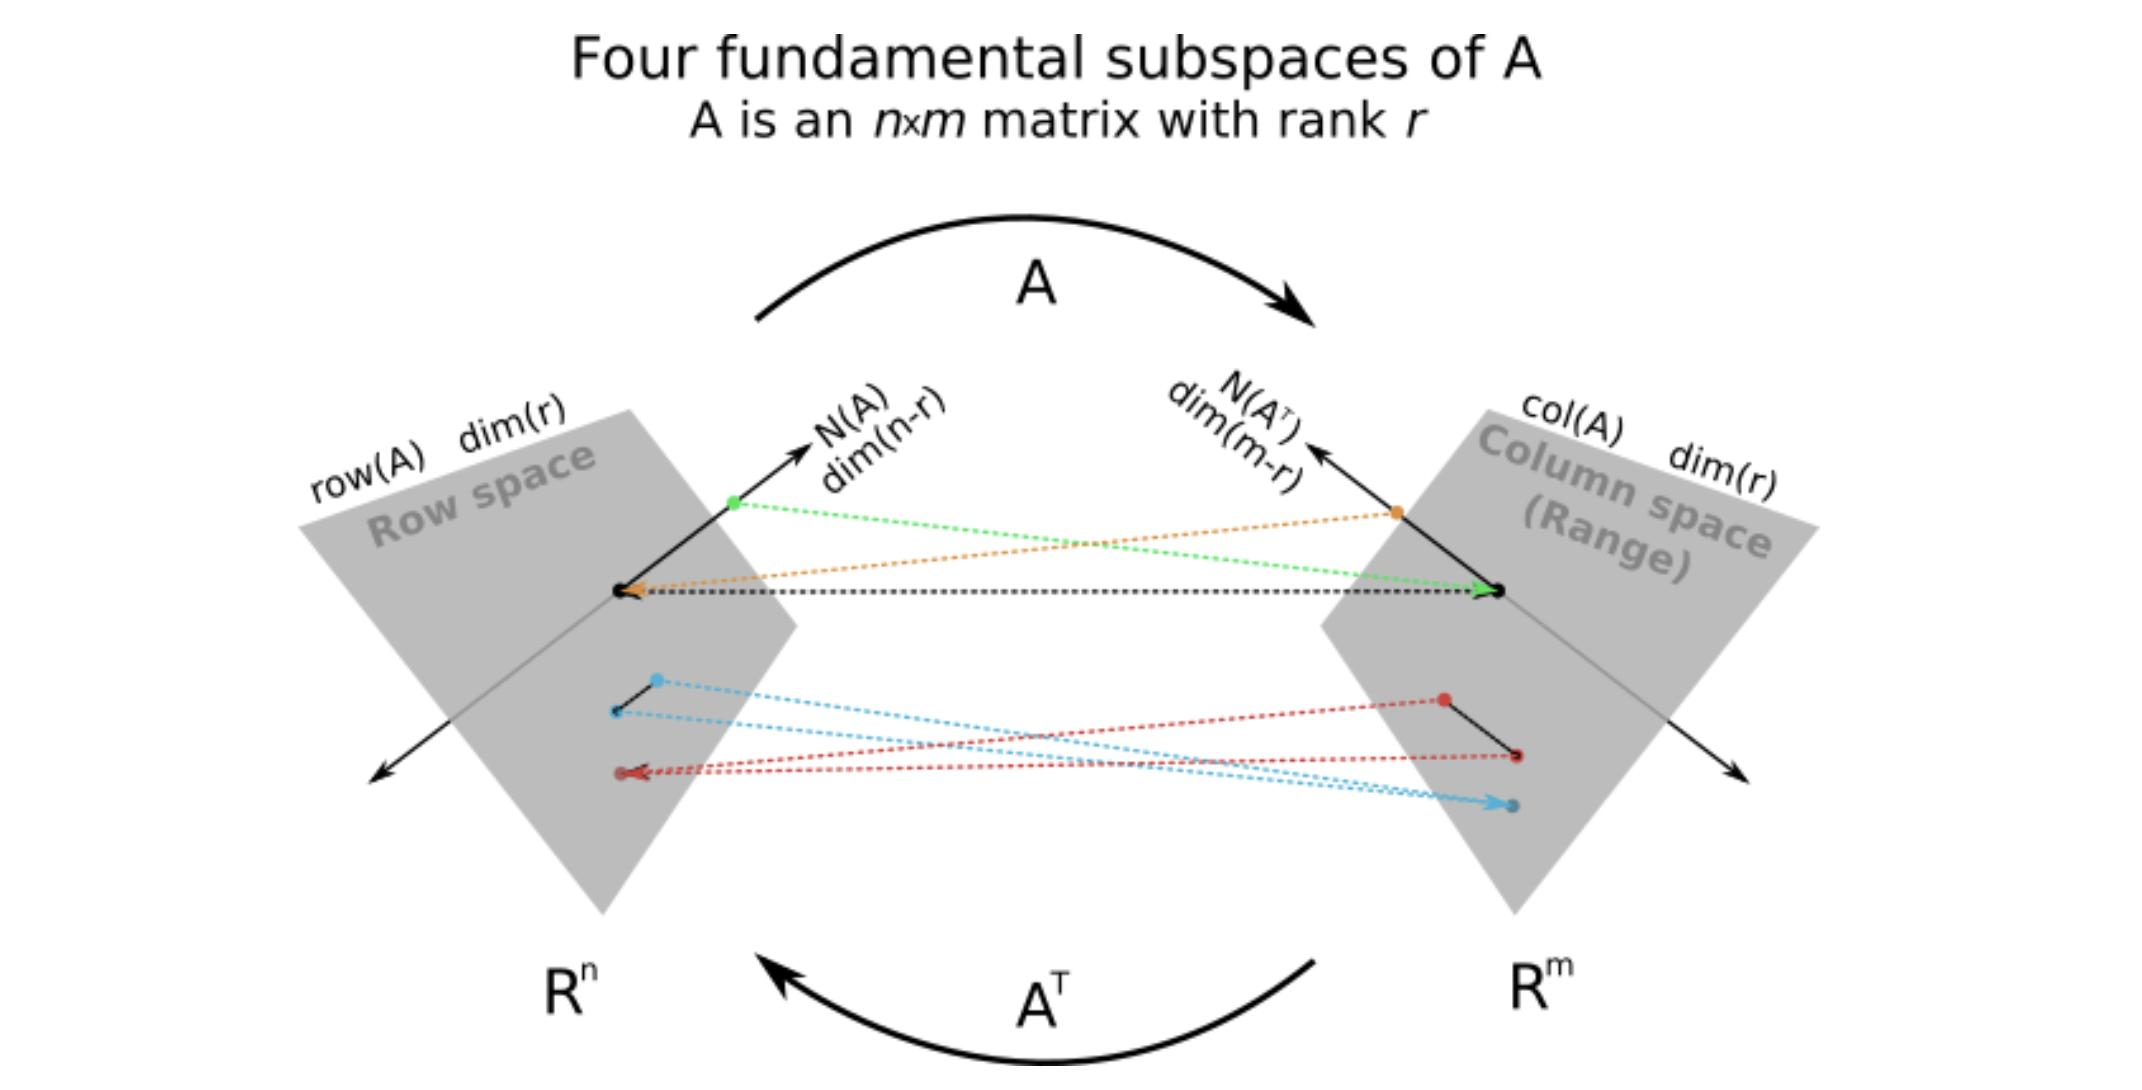

In [1]:
# environment setup, try to make it clear which library I'm using for what
import numpy as np  # nice arrays and other stuff
import sympy as sym # symbollic maths 
from sympy.matrices import Matrix # pretty matrices
from sympy import Eq # pretty equations
from sympy.physics.quantum.dagger import Dagger # we'll want this later...
from math import e, pi, sqrt # Mathy math math
from mpl_toolkits.mplot3d import Axes3D # we like 3d quivers for tutorials
import matplotlib.pyplot as plt # old standby for plotting like a villian
from IPython.display import display, Math, Latex # used to display formatted results in the console
sym.init_printing()  # initialize pretty printing

### 1. Let $v_1=\begin{bmatrix}2\\-8\\6\end{bmatrix}$, $v_2=\begin{bmatrix}-3\\8\\-7\end{bmatrix}$, $v3=\begin{bmatrix}-4\\6\\-7\end{bmatrix}$, $p=\begin{bmatrix}6\\-10\\11\end{bmatrix}$, and $A=\begin{bmatrix}v_1&&v_2&&v_3\end{bmatrix}$.

#### a. How many vector are in {$v_1,v_2,v_3$}?
3
#### b. How many vectors are in Col $A$?
$\infty$
#### c. Is $\bf{p}$ in Col $A$? Why or why not?
Yes, because $A$ Spans $\mathbb{R^3}$.
#### d. Determine if $\bf{p}$ is in the Nul $A$.
No, because it is in the Column Space.

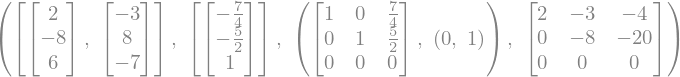

In [2]:
# P1. Calculations
x = sym.symbols('x1 x2 x3')
A = Matrix([[2,-3,-4],[-8,8,6],[6,-7,-7]])
p = Matrix([6,-10,11])
Au= A.row_join(p)
A.columnspace(), A.nullspace(), A.rref(), A.echelon_form()

### 2. Determine which of the following sets are bases for $\mathbb{R^2}$ or $\mathbb{R^3}$?

#### $\begin{Bmatrix}\begin{bmatrix}5\\-2\end{bmatrix},\begin{bmatrix}10\\-3\end{bmatrix}\end{Bmatrix}$, $\begin{Bmatrix}\begin{bmatrix}-4\\6\end{bmatrix},\begin{bmatrix}2\\-3\end{bmatrix}\end{Bmatrix}$, $\begin{Bmatrix}\begin{bmatrix}0\\1\\-2\end{bmatrix},\begin{bmatrix}5\\-7\\4\end{bmatrix},\begin{bmatrix}6\\3\\5\end{bmatrix}\end{Bmatrix}$.

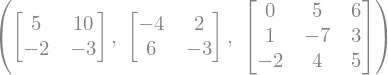

In [3]:
A = Matrix([[5,10],[-2,-3]])
B = Matrix([[-4,2],[6,-3]])
C = Matrix([[0,5,6],[1,-7,3],[-2,4,5]])
A, B, C

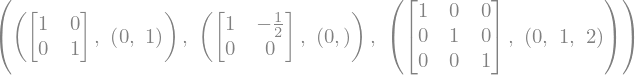

In [4]:
A.rref(), B.rref(), C.rref()

The first and thrid sets form a bases for $\mathbb{R^2}$ are $\mathbb{R^3}$ respectively, however the second set does not.

### 3. The four fundumental Subspace of a Matrix $A_{mxn}$.
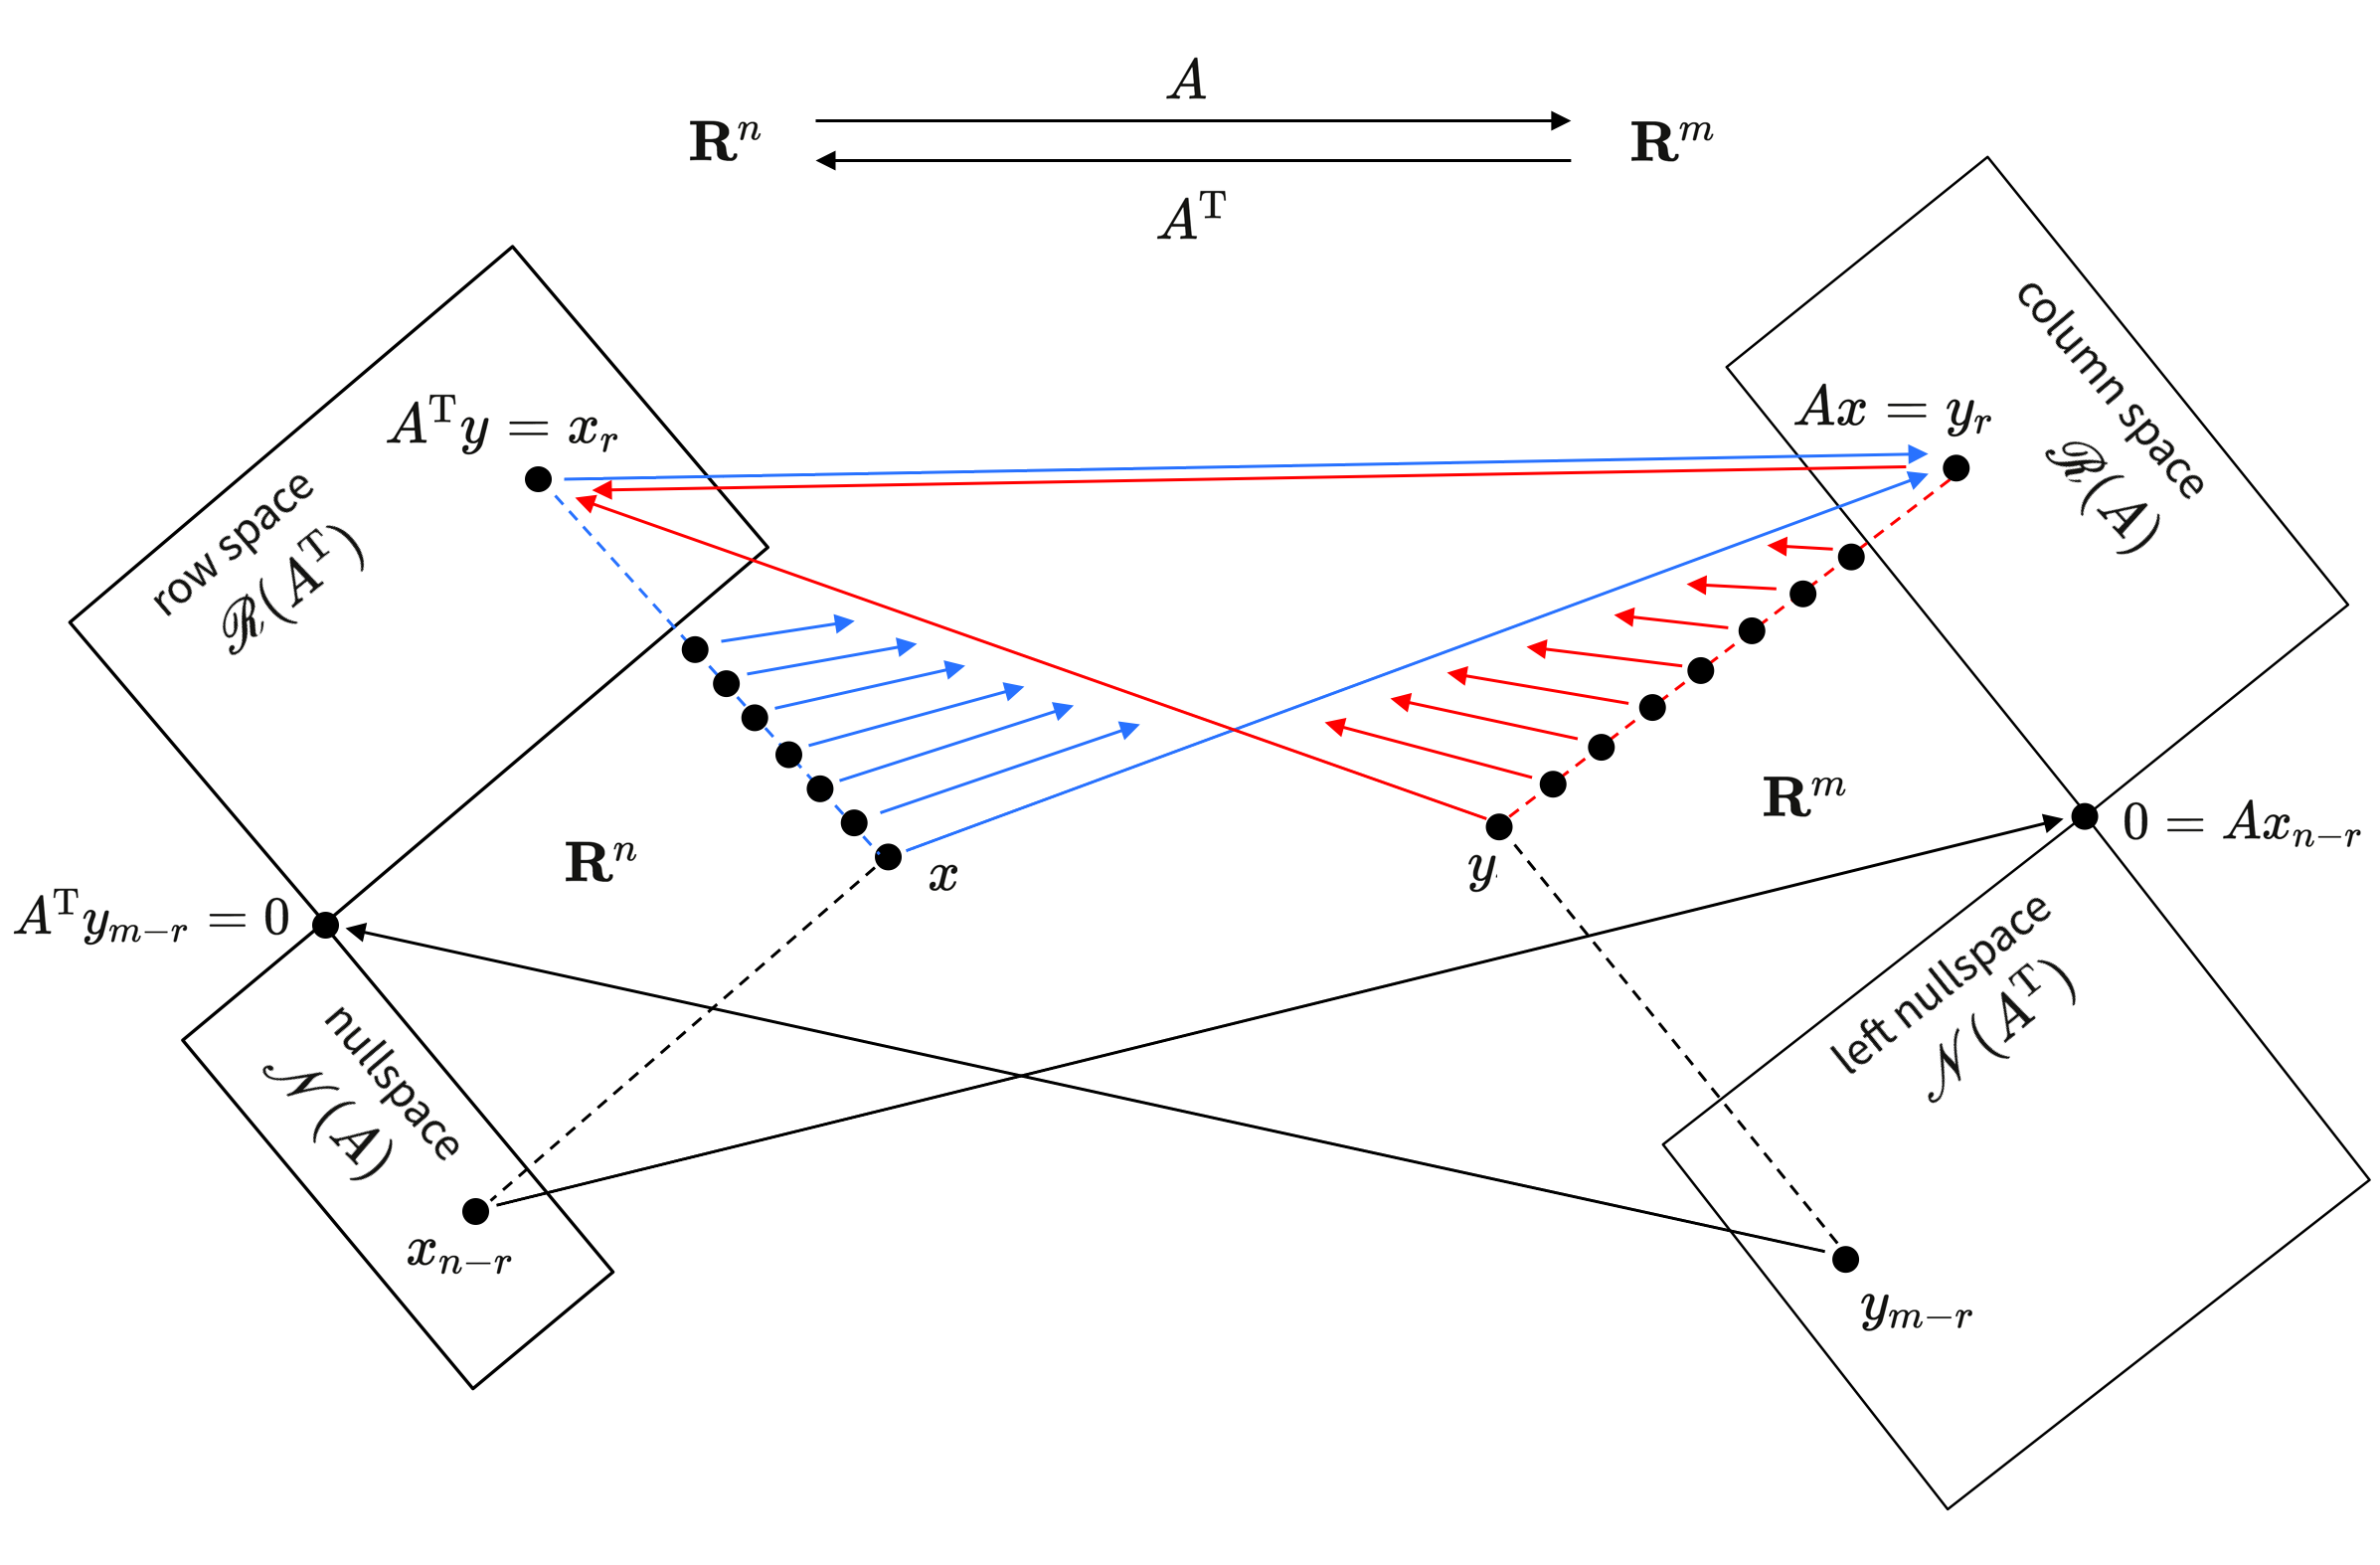
##### Image from: https://kmr.dialectica.se/wp/research/math-rehab/learning-object-repository/algebra/linear-algebra/linear-transformations/the-rank-nullity-theorem-of-linear-algebra/

#### Let $A=\begin{bmatrix}1&&-2&&0&&3\\ 2&&-3&&-1&&-4\\ 3&&-5&&-1&&-1\end{bmatrix}$.

#### a. Find a basis for Col $A$, Nul $A$, Row $A$ = Col $A^T$ and Nul $A^T$.

In [5]:
A = Matrix([[1,-2,0,3],[2,-3,-1,-4],[3,-5,-1,-1]])
B  = Matrix([[1,0,0],[2,1,0],[-1,0,1]]) * Matrix([[5,0,3],[0,1,1],[0,0,0]])
C = Matrix([[1,0],[0,1],[0,0]])
A= A
Arref, Apivots = A.rref()
basis_ColA = [A.col(col) for col in Apivots] # same as A.columnspace() but just flexing
display(Latex(f'$A={sym.latex(A)}$ '))
display(Latex(f'$A.rref()={sym.latex(A.rref())}$ '))

display(Latex('$\mathbb{R^n}$: $A^Ty=x_r$'))
display(Latex(f'Row $A$ basis: ${sym.latex(A.rowspace())}$ (rowspace)'))
display(Latex(f'Nul $A$ basis: ${sym.latex(A.nullspace())}$ (nullspace, $x(n-r)$->$0=Ax$)'))

display(Latex('$\mathbb{R^m}$: $Ax=y_r$'))
display(Latex(f'Col $A$ basis: ${sym.latex(A.columnspace())}$ (column space)'))
display(Latex(f'Nul $A^T$ basis: ${sym.latex( A.T.nullspace())}$ (left nullspace, $y(m-r)$->$0=A^Ty$'))

display(Latex('Inner Space:'))
display(Latex(f'Row $A.T$ basis: ${sym.latex(A.T.rowspace())}$ (other rowspace)'))
display(Latex(f'Col $A.T$ basis: ${sym.latex((A.T).columnspace())}$ (other column space)'))
display(Latex(f'Note: RRef $A$ is ${sym.latex(A.rref())}$,   Rank $A$ is ${sym.latex(A.rank())}$'))
display(Latex(f'Note: RRef $A.T$ is ${sym.latex(A.T.rref())}$,   Rank $A.T$ is ${sym.latex(A.T.rank())}$,\
      *rather interesting, this rank nulity, me thinkreom'))
#A.shape, A.T.shape
#Matrix([A.columnspace()]).shape, Matrix([A.nullspace()]).shape, Matrix(A.rowspace()).shape, Matrix([A.T.columnspace()]).shape, Matrix([A.T.nullspace()]).shape

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

#### b. Find the inner product of the basis of Row $A$ with the basis of Nul $A$.

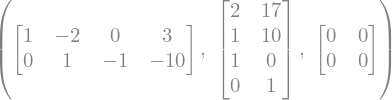

In [6]:
RowA = Matrix(A.rowspace()) # note lack of brackets
NulA = Matrix([A.nullspace()]) # note brackets
RowA, NulA, RowA*NulA # are we showing these subspaces are orthagonal, think about ϵ^2...

#### c. Find the inner product of the basis of Col A and the basis of Nul $A^T$.

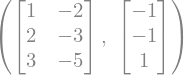

In [7]:
ColA = Matrix([A.columnspace()])
NulAT = Matrix(A.T.nullspace()) 
ColA, NulAT, #ColA.T*NulAT#, ColA.T.dot(NulAT) # ColA must be transposed for dot product 
# FIXME!!! why isn't this zero???

### 4. If possible, construct a 3x4 matrix $A$ such that ¿dim? Nul $A=2$ and dim Col $A=2$ .

<IPython.core.display.Latex object>

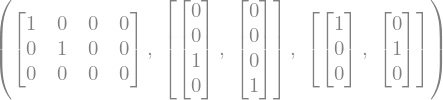

In [8]:
A = Matrix([[1,0,0,0],[0,1,0,0],[0,0,0,0]])
display(Latex('A 2x2 matrix of zeroes on the inside would be needed, so yes... but think more about this.'))
A, A.nullspace(), A.columnspace()

### 5. Decide, without a calculator nor a computation of inverse, whether the following matrices are invertible or singular and explain your decision.

In [9]:
A = Matrix([[5,7],[-3,-6]])
B = Matrix([[-4,6],[6,-9]])
C = Matrix([[5,0,0],[-3,-7,0],[8,5,-1]])
D = Matrix([[-7,0,4],[3,0,-1],[2,0,9]])

m = [[A,'A', 'Invertable, nonzero trace.'],\
     [B,'B', 'Singular, Columns are multiples.'],\
     [C,'C', 'Invertable, nonzero trace.'],\
     [D,'D', 'Singular, Zero determinate.']]
for M,name,note in m:
    display(Latex(f'${name}={sym.latex(M)}$   {note}  (Invertible? {M.det()!=0})')) 

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

### 6. Let $H$ = $Span\begin{Bmatrix}v_1,v_2\end{Bmatrix}$ and $\mathcal{B}\begin{Bmatrix}v_1,v_2\end{Bmatrix}$.
### Show that $x$ is in $H$, and find the $\mathcal{B}$-coordinate vector of $x$, when
#### $v_1=\begin{bmatrix}11\\-5\\10\\7\end{bmatrix}$, $v_2=\begin{bmatrix}14\\-8\\13\\10\end{bmatrix}$, $x=\begin{bmatrix}19\\-13\\18\\15\end{bmatrix}$

In [10]:
v1 = Matrix([11,-5,10,7])
v2 = Matrix([14,-8,13,10])
x = Matrix([19,-13,18,15])
v1, v2, x
M = x.hstack(v1, v2, x)
M, M.rref()
display(Latex(f'$M={sym.latex(M)}$,\
 $M.rref={sym.latex(M.rref())}$\
 **2 pivots and 3 columns thus $x$ is in $H$\
'))

<IPython.core.display.Latex object>

### 7. Let $A=\begin{bmatrix}4&&0&&-2\\2&&5&&4\\0&&0&&5\end{bmatrix}$.

#### a) Find an eigenbasis for $\mathbb{R^3}$ corresponding to A.

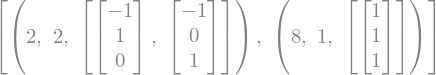

In [11]:
A = Matrix([[4,0,-2],[2,5,4],[0,0,5]])
A = Matrix([[4,2,2],[2,4,2],[2,2,4]])
#A.eigenvals()
A.eigenvects() # for form (val, multiplicity, vectors)

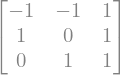

In [12]:
def eigenbasis(A):
    eA = A.eigenvects()
    init = True
    for v in eA:
        if init == True:  # consider if there is a better way
            init = False
            vv = Matrix([v[2]])
        else:
            vv= vv.row_join(Matrix([v[2]]))
    return vv

A_B = eigenbasis(A)  # can't argue with results
A_B

#### b) Express the vector $x=\begin{bmatrix}1\\1\\1\end{bmatrix}$ as a linear combination of the vector in the eigenbasis of $A$.

In [13]:
X = Matrix(sym.symbols('x1 x2 x3'))

x= Matrix([1,1,1])
X.T * A_B*x # FIXME, verify this

#### c) Use your result in part b) to find $A^3x$. Do not explicitly compute $A^3$.

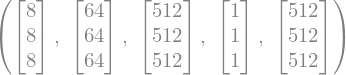

In [14]:
# FIXME
A*x, A*A*x, A*A*A*x, x, A**3*x

### Appendix. Markdown Playground

<table>
    <tr>
        <td>
\begin{eqnarray}
\nabla \times \vec{\mathbf{B}} -\, \frac1c\, \frac{\partial\vec{\mathbf{E}}}{\partial t} & = \frac{4\pi}{c}\vec{\mathbf{j}} \\
\nabla \cdot \vec{\mathbf{E}} & = 4 \pi \rho \\
\end{eqnarray}
        </td>
        <td>
\begin{eqnarray}
\nabla \times \vec{\mathbf{E}}\, +\, \frac1c\, \frac{\partial\vec{\mathbf{B}}}{\partial t} & = \vec{\mathbf{0}} \\
\nabla \cdot \vec{\mathbf{B}} & = 0
\end{eqnarray}
        </td>
    </tr>
</table>

In [15]:
from IPython.display import Latex
Latex(r"""\begin{eqnarray}
\nabla \times \vec{\mathbf{B}} -\, \frac1c\, \frac{\partial\vec{\mathbf{E}}}{\partial t} & = \frac{4\pi}{c}\vec{\mathbf{j}} \\
\nabla \cdot \vec{\mathbf{E}} & = 4 \pi \rho \\
\nabla \times \vec{\mathbf{E}}\, +\, \frac1c\, \frac{\partial\vec{\mathbf{B}}}{\partial t} & = \vec{\mathbf{0}} \\
\nabla \cdot \vec{\mathbf{B}} & = 0 
\end{eqnarray}""")

<IPython.core.display.Latex object>

In [16]:
%%latex
\begin{align}
\nabla \times \vec{\mathbf{B}} -\, \frac1c\, \frac{\partial\vec{\mathbf{E}}}{\partial t} & = \frac{4\pi}{c}\vec{\mathbf{j}} \\
\nabla \cdot \vec{\mathbf{E}} & = 4 \pi \rho \\
\nabla \times \vec{\mathbf{E}}\, +\, \frac1c\, \frac{\partial\vec{\mathbf{B}}}{\partial t} & = \vec{\mathbf{0}} \\
\nabla \cdot \vec{\mathbf{B}} & = 0
\end{align}

<IPython.core.display.Latex object>

### Appendix. Practice Problems (Lay)

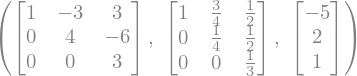

In [30]:
# PP 4.3.1
Pb = Matrix([[1,-3,3],[0,4,-6],[0,0,3]])
x = Matrix([-8,2,3])
Pb, Pb.inv(), Pb.inv()*x

In [18]:
from sympy import Matrix 
A = [[1, 2, 3], [4, 5, 6], [7, 8, 9]] 
A = Matrix(A) 
n = A.shape[1] 
rank = A.rank() 
nullity = n - rank 
print("Nullity : ", nullity)
n, A.cols

Nullity :  1


In [19]:
msg = ['01010111', '01100101',\
      '00100000', '01110011',\
      '01110101', '01110000',\
      '01110000', '01101111',\
      '01110010', '01110100',\
      '00100000', '01111001',\
      '01101111', '01110101']

[chr(int(i, base=2)) for i in msg]

['W', 'e', ' ', 's', 'u', 'p', 'p', 'o', 'r', 't', ' ', 'y', 'o', 'u']

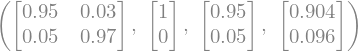

In [20]:
#PP4.9.1
s = sym.symbols('city suburbs')
M = Matrix([[0.95,0.03],[0.05,0.97]])
x = Matrix([0.6,0.4])
x0 = Matrix([1,0])
M, x0, M*x0, M*M*x0

In [21]:
#PP4.9.2
P = Matrix([[0.6,0.2],[0.4,0.8]])
q = Matrix([0.3,0.7])
((P - sym.eye(2))*q == q), P*q == q

(False, False)

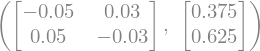

In [22]:
#PP4.9.3
(M - sym.eye(2)), (M**100*x).n(3)

### Appendix. Examples (Klien)

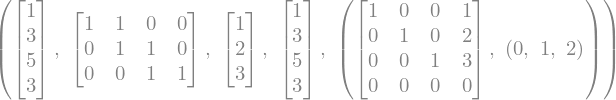

In [23]:
#Ex 5.1.1
v = Matrix([1,3,5,3])
B = Matrix([[1,1,0,0],[0,1,1,0],[0,0,1,1]])
c = Matrix([1,2,3])

v,B,c, B.T*c, B.T.row_join(v).rref()

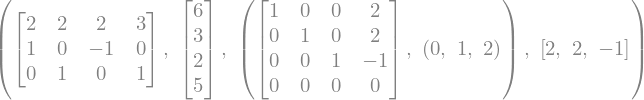

In [24]:
#Ex 5.1.2
v = Matrix([6,3,2,5])
A = Matrix([[2,2,2,3],[1,0,-1,0],[0,1,0,1]])
A,v, A.T.row_join(v).rref(), A.T.row_join(v).rref(pivots=False).col(3)[:3]

In [25]:
#Ex 5.1.3
v = Matrix([0,0,0,1])
A = Matrix([[1,1,0,1],[0,1,0,1],[1,1,0,0]])
c = Matrix(A.T.row_join(v).rref(pivots=False).col(-1)[:-1])
c.applyfunc(lambda x: x%2) # map to GF2

### Appendix. Explorations

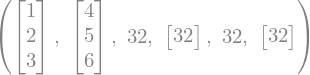

In [26]:
# dot products
v1 = Matrix([1,2,3])
v2 = Matrix([4,5,6])

v1, v2, v1.dot(v2), v1.T*v2, v2.dot(v1), v2.T*v1

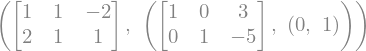

In [27]:
M = Matrix([[1,1,-2],[2,1,1]])
M, M.rref()

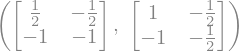

In [28]:
P = Matrix([[sym.Rational(1,2),sym.Rational(-1,2)],[-1,-1]])
P, P.inv()